In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# NLST

In [131]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv')
df = df.query('(diag_dis < 2 and gt_reg == 1) or (diag_dis > 2 and gt_reg == 0)')
#df = df.query('gt_reg == 1')
df = df.query('plco == plco')
df = df.loc[df['subfold'] == 'withlabel']
print (len(df))
df = df.query('lastitem == 1')
print (len(df))
# item = df['pkyr'].tolist()
# plt.hist(item,  bins=11)  # `density=False` would make counts
# #plt.xticks(range(70))
# plt.title('NLST packyear Histogram', fontsize =15 )
# plt.ylabel('# subjects', fontsize =15)
# plt.xlabel('packyear', fontsize =15)

# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)


14346
5262


In [12]:

df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv')
df = df.query('(diag_dis < 2 and gt_reg == 1) or (diag_dis > 2 and gt_reg == 0)')
df = df.query('plco == plco')
df = df.query('mayo_risk == mayo_risk')
#df = df.loc[df['subfold']== 'withlabel']
print (len(df), sum(df['gt_reg']))
df = df.query('lastitem == 1')

print (len(df), sum(df['gt_reg']))
age_list = df['age_correct'].tolist()
print ('age', np.mean(age_list), np.std(age_list))

item_list = df['bmi'].tolist()
print ('bmi', np.mean(item_list), np.std(item_list))

item_list = df['copd'].tolist()
print ('copd', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['phist'].tolist()
print ('phist', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['fhist'].tolist()
print ('fhist', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['smo_status'].tolist()
sub0 = sum(np.array(item_list) == 0)
sub1 = sum(np.array(item_list) == 1) 
sub2 = sum(np.array(item_list) == 2) 
print ('smo_status: never, former, current', sub0, sub1, sub2)

smo_intensity = df['intensity'].tolist()
duration = df['duration'].tolist()
pkyr = [smo_intensity[i] * duration[i] / 20 for i in range(len(duration))]
print ('pkyr', np.mean(pkyr), np.std(pkyr))

item_list = df['quit_time'].tolist()
print ('quit_time', np.mean(item_list), np.std(item_list))

item_list = df['edu'].tolist()
sub1 = sum(np.array(item_list) == 1)
sub2 = sum(np.array(item_list) == 2)
sub3 = sum(np.array(item_list) == 3)
sub4 = sum(np.array(item_list) == 4)
sub5 = sum(np.array(item_list) == 5)
sub6 = sum(np.array(item_list) == 6)
print ('education: lessHighScho, HighScho, PosHighScho, Associate, Bachelor, Graduate',  sub1, sub2, sub3, sub4, sub5, sub6)

item_list = df['race'].tolist()
sub1 = sum(np.array(item_list) == 1)
sub2 = sum(np.array(item_list) == 2)
sub3 = sum(np.array(item_list) == 3)
sub4 = sum(np.array(item_list) == 5)
sub5 = sum(np.array(item_list) == 2.5)
sub6 = sum(np.array(item_list) == 4)
print ('race: White, Black, Asian, Pacific, Latnio, Indian',  sub1, sub2, sub3, sub4, sub5, sub6)

item_list = df['nodule_size'].tolist()
print ('nodule_size', np.mean(item_list), np.std(item_list))

item_list = df['spiculation'].tolist()
print ('spiculation', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['upperlobe'].tolist()
print ('upperlobe', len(item_list), sum(item_list), sum(item_list) / len(item_list))



18225 795
6781 597
age 63.484146880991005 5.098636952605447
bmi 27.67364020410545 4.860157427622526
copd 6781 391.0 0.05766111193039375
phist 6781 304 0.04483114584869488
fhist 6781 1541 0.22725261760802243
smo_status: never, former, current 0 3440 3341
pkyr 57.0059873175048 23.54308901868958
quit_time 4.422946468072555 5.556071376845802
education: lessHighScho, HighScho, PosHighScho, Associate, Bachelor, Graduate 404 1692 985 1559 1078 943
race: White, Black, Asian, Pacific, Latnio, Indian 6364 243 140 18 0 16
nodule_size 8.208081403922725 6.621872534399117
spiculation 6781 673.0 0.09924789854003835
upperlobe 6781 1151.0 0.16973897655213097


In [128]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/nlst/NLST_withimage.csv')
df = df.query('(diag_dis < 2 and gt_reg == 1) or (diag_dis > 2 and gt_reg == 0)')
df = df.query('plco == plco')
print (len(df))
df = df.query('gt_reg == 1')
print (len(df))
df = df.query('lastitem == 1')


64898
1037


In [129]:
print (len(df))

706


# for VLSP

In [118]:
def get_lastitem_csv(ori_csv):
    df = pd.read_csv(ori_csv)
    subj_sess = {}
    for i, item in df.iterrows():
        subj = item['subject']
        if subj not in subj_sess.keys():
            subj_sess[subj] = []
        subj_sess[subj].append(item['id'])
    for key in subj_sess.keys():
        subj_sess[key] = sorted(subj_sess[key])
    
    lastitem = []
    for i, item in df.iterrows():
        subj = item['subject']
        if item['id'] == subj_sess[subj][-1]:
            lastitem.append(1)
        else:
            lastitem.append(0)
    df['lastitem_fake'] = lastitem
    df.to_csv(ori_csv)
get_lastitem_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/spore/spore_with2yr.csv')

In [52]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/spore/Limitedhistory20200420.csv')
df = df.query('subject == subject')
df = df.query('lastitem == 1')
df = df.query('plco == plco')
df = df.query('withimage == 1')
df = df.query('gt_reg == 1 or cntCT > 3')
dfcancer = df.query('gt_reg == 1')
print (len(set(df['subject'].tolist())), len(df['subject']))
print (len(set(dfcancer['subject'].tolist())), len(dfcancer['subject']))

67 67
21 21


147 221
21 40
147 221
21 40


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text yticklabel objects>)

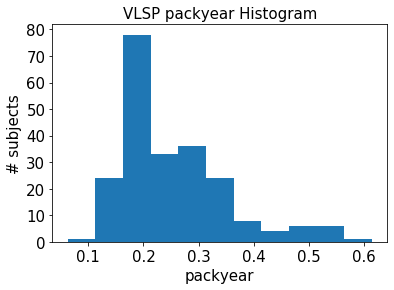

In [122]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/spore/norm/spore_with2yr.csv')
#df = df.query('lastitem_fake == 1')
df = df.query('plco == plco')
dfcancer = df.query('gt_reg == 1')
print (len(set(df['subject'].tolist())), len(df['subject']))
print (len(set(dfcancer['subject'].tolist())), len(dfcancer['subject']))
print (len(set(df['subject'].tolist())), len(df['subject']))
print (len(set(dfcancer['subject'].tolist())), len(dfcancer['subject']))
item = df['pkyr'].tolist()

plt.hist(item,  bins=11)  # `density=False` would make counts

plt.title('VLSP packyear Histogram', fontsize =15)
plt.ylabel('# subjects', fontsize =15)
plt.xlabel('packyear', fontsize =15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [124]:
# age  session level

df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/spore/spore_with2yr.csv')
df = df.query('plco == plco')
df = df.query('lastitem_fake == 1')
age_list = df['age'].tolist()
print ('age', np.mean(age_list), np.std(age_list))

item_list = df['bmi'].tolist()
print ('bmi', np.mean(item_list), np.std(item_list))

item_list = df['quit_time'].tolist()
print ('quit_time', np.mean(item_list), np.std(item_list))

item_list = df['copd'].tolist()
print ('copd', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['phist'].tolist()
print ('phist', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['fhist'].tolist()
print ('fhist', len(item_list), sum(item_list), sum(item_list) / len(item_list))

item_list = df['smo_status'].tolist()
sub0 = sum(np.array(item_list) == 0)
sub1 = sum(np.array(item_list) == 1)
sub2 = sum(np.array(item_list) == 2)
print ('smo_status: never, former, current', sub0, sub1, sub2)

smo_intensity = df['smo_intensity'].tolist()
duration = df['duration'].tolist()
pkyr = [smo_intensity[i] * duration[i] / 20 for i in range(len(duration))]
print ('pkyr', np.mean(pkyr), np.std(pkyr))

item_list = df['edu'].tolist()
sub1 = sum(np.array(item_list) == 1)
sub2 = sum(np.array(item_list) == 2)
sub3 = sum(np.array(item_list) == 3)
sub4 = sum(np.array(item_list) == 4)
sub5 = sum(np.array(item_list) == 5)
sub6 = sum(np.array(item_list) == 6)
print ('education: lessHighScho, HighScho, PosHighScho, Associate, Bachelor, Graduate',  sub1, sub2, sub3, sub4, sub5, sub6)

item_list = df['race'].tolist()
sub1 = sum(np.array(item_list) == 1)
sub2 = sum(np.array(item_list) == 2)
sub3 = sum(np.array(item_list) == 3)
sub4 = sum(np.array(item_list) == 5)
sub5 = sum(np.array(item_list) == 2.5)
sub6 = sum(np.array(item_list) == 4)
print ('race: White, Black, Asian, Pacific, Latnio, Indian',  sub1, sub2, sub3, sub4, sub5, sub6)

age 64.80272108843538 5.032735634804135
bmi 28.276699601022802 5.68268909827058
quit_time 3.251700680272109 5.840095443977045
copd 147 41.0 0.2789115646258503
phist 147 30.0 0.20408163265306123
fhist 147 38.0 0.2585034013605442
smo_status: never, former, current 0 60 87
pkyr 49.11625850340136 19.85410738055867
education: lessHighScho, HighScho, PosHighScho, Associate, Bachelor, Graduate 6 29 5 37 35 35
race: White, Black, Asian, Pacific, Latnio, Indian 134 12 0 0 1 0


428

68.61462728551336 9.858521546525429


449 711


27.496544117647062 6.3495860366081285


In [31]:
start_list = [i for i in start_list if i == i and i != 'NA']
print (np.mean(start_list), np.std(start_list))

18.247334754797443 7.015564354796942


In [32]:
quit_list = [i for i in quit_list if i == i and i != 'NA']
print (np.mean(quit_list), np.std(quit_list))

54.282051282051285 13.560992001116666


In [36]:
pky_list = [i for i in pky_list if i == i and i != 'NA']
print (np.mean(pky_list), np.std(pky_list))

48.80180084745763 32.10875198219959


In [40]:
df_spore = pd.read_csv('/share3/gaor2/share5backup/data/SPORE/clinical/new3.csv')
age_list = df_spore['Age'].tolist()
sincequit_list = df_spore['yearssincequit'].tolist()

quit_list = [age_list[i] - sincequit_list[i] for i in range(len(age_list))]
print (np.mean(quit_list), np.std(quit_list))


62.06188925081433 7.031067424958634


# MCL

In [96]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0421/Report_part1_nodup.csv')
df = df.query('cancer_bengin == 0')
df = df.loc[df['withimg_0330'] == 1]
df = df.loc[(df['mayo_diag'] ==df['mayo_diag']) | (df['mayo_ct'] ==df['mayo_ct'])]

df = df.query('new_in0398 == 1 or new_in1730 == 1 or new_in0136 == 1 or new_in1078 == 1')

df = df.query('nodule_size > 5.9 and nodule_size < 30.1')

mcl_list = []
cancer_list = []
for i, item in df.iterrows():
    try:
        if item['mayo_diag'] == item['mayo_diag'] and item['mayo_diag'] >= 0.05 and item['mayo_diag'] <= 0.65:
            mcl_list.append(item['MCL_ID'])
            if item['cancer_bengin'] == 1:
                cancer_list.append(item['MCL_ID'])
        elif item['mayo_ct'] == item['mayo_ct'] and item['mayo_ct'] >= 0.05 and item['mayo_ct'] <= 0.65:
            mcl_list.append(item['MCL_ID'])
            if item['cancer_bengin'] == 1:
                cancer_list.append(item['MCL_ID'])
    except:
        print (item['mayo_diag'], item['mayo_ct'])
print (len(set(mcl_list)), len(set(cancer_list)))

130 0


In [ ]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/IPN_biomarker-MK_nopassword.csv')



In [97]:
item_list = df['ctage'].tolist()
print (np.mean(item_list), np.std(item_list))

63.618199999999995 9.861835993363508


In [98]:
item_list = df['nodule_size'].tolist()
print (np.mean(item_list), np.std(item_list))

14.9048 6.139965550391956


In [99]:
item_list = df['smok'].tolist()
print (len(item_list), sum(item_list), sum(item_list) / len(item_list))

250 223.0 0.892


In [100]:
item_list = df['prior_cancer'].tolist()
print (len(item_list), sum(item_list), sum(item_list) / len(item_list))

250 105.0 0.42


In [101]:
item_list = df['spicul'].tolist()
print (len(item_list), sum(item_list), sum(item_list) / len(item_list))

250 27 0.108


In [102]:
item_list = df['upperlobe'].tolist()
print (len(item_list), sum(item_list), sum(item_list) / len(item_list))

250 116 0.464
